# import basic package 

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [95]:
x = pd.read_csv("C:\\Users\\sumeera\\Desktop\\data science\\dataset\\credit.csv")
x.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [96]:
x.shape

(1000, 17)

# Data is to noisy so few cleaning steps

In [97]:
x['checking_balance'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [98]:
###removed everything expect number by using regular expression syntex 
x['checking_balance']=x['checking_balance'].replace('[^0-9]',"",regex=True)

In [99]:
x['checking_balance'].value_counts()

        394
0       274
1200    269
200      63
Name: checking_balance, dtype: int64

In [100]:
#replacing blank values with nan values 
x['checking_balance']=x['checking_balance'].replace("",np.nan,regex=True)
x['checking_balance'].value_counts(normalize=True)*100

0       45.214521
1200    44.389439
200     10.396040
Name: checking_balance, dtype: float64

In [101]:
##filling nan values wit place holder values
x['checking_balance'].fillna(500,inplace=True)

In [102]:
a=x['checking_balance'].value_counts()
b=(a/a.sum()*100).lt(27)
x['checking_balance']=np.where(x['checking_balance'].isin(a[b].index),1200,x['checking_balance'])

In [103]:
x['checking_balance'].value_counts()

500     394
1200    332
0       274
Name: checking_balance, dtype: int64

In [104]:
x['credit_history'].value_counts(normalize=True)*100

good         53.0
critical     29.3
poor          8.8
very good     4.9
perfect       4.0
Name: credit_history, dtype: float64

In [105]:
x['credit_history'].isnull().sum()

0

In [106]:
a=pd.value_counts(x["credit_history"])
b=(a/a.sum()*100).lt(30)
x["credit_history"]=np.where(x["credit_history"].isin(a[b].index),"critical",x["credit_history"])

In [107]:
x['credit_history'].value_counts()

good        530
critical    470
Name: credit_history, dtype: int64

In [108]:
x['purpose'].value_counts(normalize=True)*100

furniture/appliances    47.3
car                     33.7
business                 9.7
education                5.9
renovations              2.2
car0                     1.2
Name: purpose, dtype: float64

In [109]:
a=x['purpose'].value_counts()
b=(a/a.sum()*100).lt(34)
x['purpose']=np.where(x['purpose'].isin(a[b].index),'car',x['purpose'])

In [110]:
x['purpose'].value_counts()

car                     527
furniture/appliances    473
Name: purpose, dtype: int64

In [111]:
x['savings_balance'].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [112]:
x['savings_balance']=x['savings_balance'].replace("[^0-9]","",regex=True)

In [113]:
x['savings_balance']=x['savings_balance'].replace("",np.nan,regex=True)

In [114]:
x['savings_balance'].value_counts(normalize=True)*100

100        73.806610
100500     12.607099
5001000     7.711138
1000        5.875153
Name: savings_balance, dtype: float64

In [115]:
x['savings_balance'].isnull().sum()

183

In [116]:
a = x['savings_balance'].value_counts()
b = (a/a.sum()*100).lt(12)
x['savings_balance']=np.where(x['savings_balance'].isin(a[b].index),1000,x['savings_balance'])

In [117]:
x['savings_balance'].value_counts()

100       603
1000      111
100500    103
Name: savings_balance, dtype: int64

In [118]:
x['employment_duration'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [119]:
x['employment_duration']=x['employment_duration'].replace("[^0-9]","",regex=True)
x['employment_duration']=x['employment_duration'].replace("",np.nan,regex=True)

In [120]:
x['employment_duration'].value_counts(normalize=True)*100

14    36.140725
7     26.972281
47    18.550107
1     18.336887
Name: employment_duration, dtype: float64

In [122]:
a=x['employment_duration'].value_counts()
b=(a/a.sum()*100).lt(26)
x['employment_duration']=np.where(x['employment_duration'].isin(a[b].index),45,x['employment_duration'])

In [123]:
x['employment_duration'].value_counts()

45    346
14    339
7     253
Name: employment_duration, dtype: int64

In [124]:
x = pd.get_dummies(x,drop_first=True)

In [125]:
x.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1200,checking_balance_0,credit_history_good,...,employment_duration_7,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [126]:
a = x.drop(['default_yes'],axis=1)
b=x['default_yes']

# importing required packages

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [128]:
clf=LogisticRegression()
clf.fit(a,b)

C:\Users\sumeera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [129]:
x_test,x_train,y_test,y_train= train_test_split(a,b,test_size=0.25,random_state=123)

In [130]:
log= LogisticRegression()
log.fit(x_train,y_train)

C:\Users\sumeera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [131]:
pred = log.predict(x_test)

In [132]:
print(confusion_matrix(y_test,pred))

[[444  88]
 [132  86]]


In [133]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       532
           1       0.49      0.39      0.44       218

    accuracy                           0.71       750
   macro avg       0.63      0.61      0.62       750
weighted avg       0.69      0.71      0.70       750



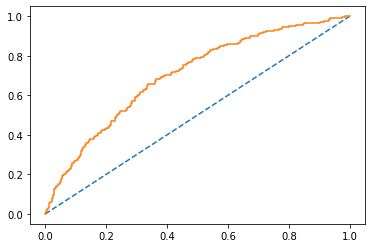

In [134]:
preda = log.predict_proba(x_test) [:,1]
fpr,tpr,tres=roc_curve(y_test,preda)
plt.plot([0,1],"--")
plt.plot(fpr,tpr)
plt.show()